In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Read dataset 

In [2]:
df = pd.read_csv('customer_churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Delete obviously unrelated columns

In [3]:
df=df.drop(['customerID','gender'],axis=1)

## 3. Adjust datatypes

In [4]:
# Yes/No to int
d = {'No': 0, 'Yes': 1, 'No phone service': 2, 'No internet service': 2}
df['SeniorCitizen'] = df['SeniorCitizen'].replace(d)
df['Partner'] = df['Partner'].replace(d)
df['Dependents'] = df['Dependents'].replace(d)
df['PhoneService'] = df['PhoneService'].replace(d)
df['MultipleLines'] = df['MultipleLines'].replace(d)
df['InternetService'] = df['InternetService'].astype('category')
df = pd.get_dummies(df, columns = ['InternetService'], 
                                        prefix=['InternetService'],drop_first=True)
df['OnlineSecurity'] = df['OnlineSecurity'].replace(d)
df['OnlineBackup'] = df['OnlineBackup'].replace(d)
df['DeviceProtection'] = df['DeviceProtection'].replace(d)
df['TechSupport'] = df['TechSupport'].replace(d)
df['StreamingTV'] = df['StreamingTV'].replace(d)
df['StreamingMovies'] = df['StreamingMovies'].replace(d)
df['Contract'] = df['Contract'].astype('category')
df = pd.get_dummies(df, columns = ['Contract'], 
                                        prefix=['Contract'],drop_first=True)
df['PaperlessBilling'] = df['PaperlessBilling'].replace(d)
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
df = pd.get_dummies(df, columns = ['PaymentMethod'], 
                                        prefix=['PaymentMethod'],drop_first=True)
df['TotalCharges'].replace(' ',0,inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype('float64')
df['Churn'] = df['Churn'].replace(d)

In [5]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,2,0,1,0,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,45,0,2,1,0,1,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [6]:
df.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year                          uint8
PaymentMethod_Credit

## 4. Deal with null values

In [7]:
# There's no null values. Therefore, there's no need to dropna.
df.isna().sum()

SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
dtype: int6

## 5. See correlations between predictors

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot: >

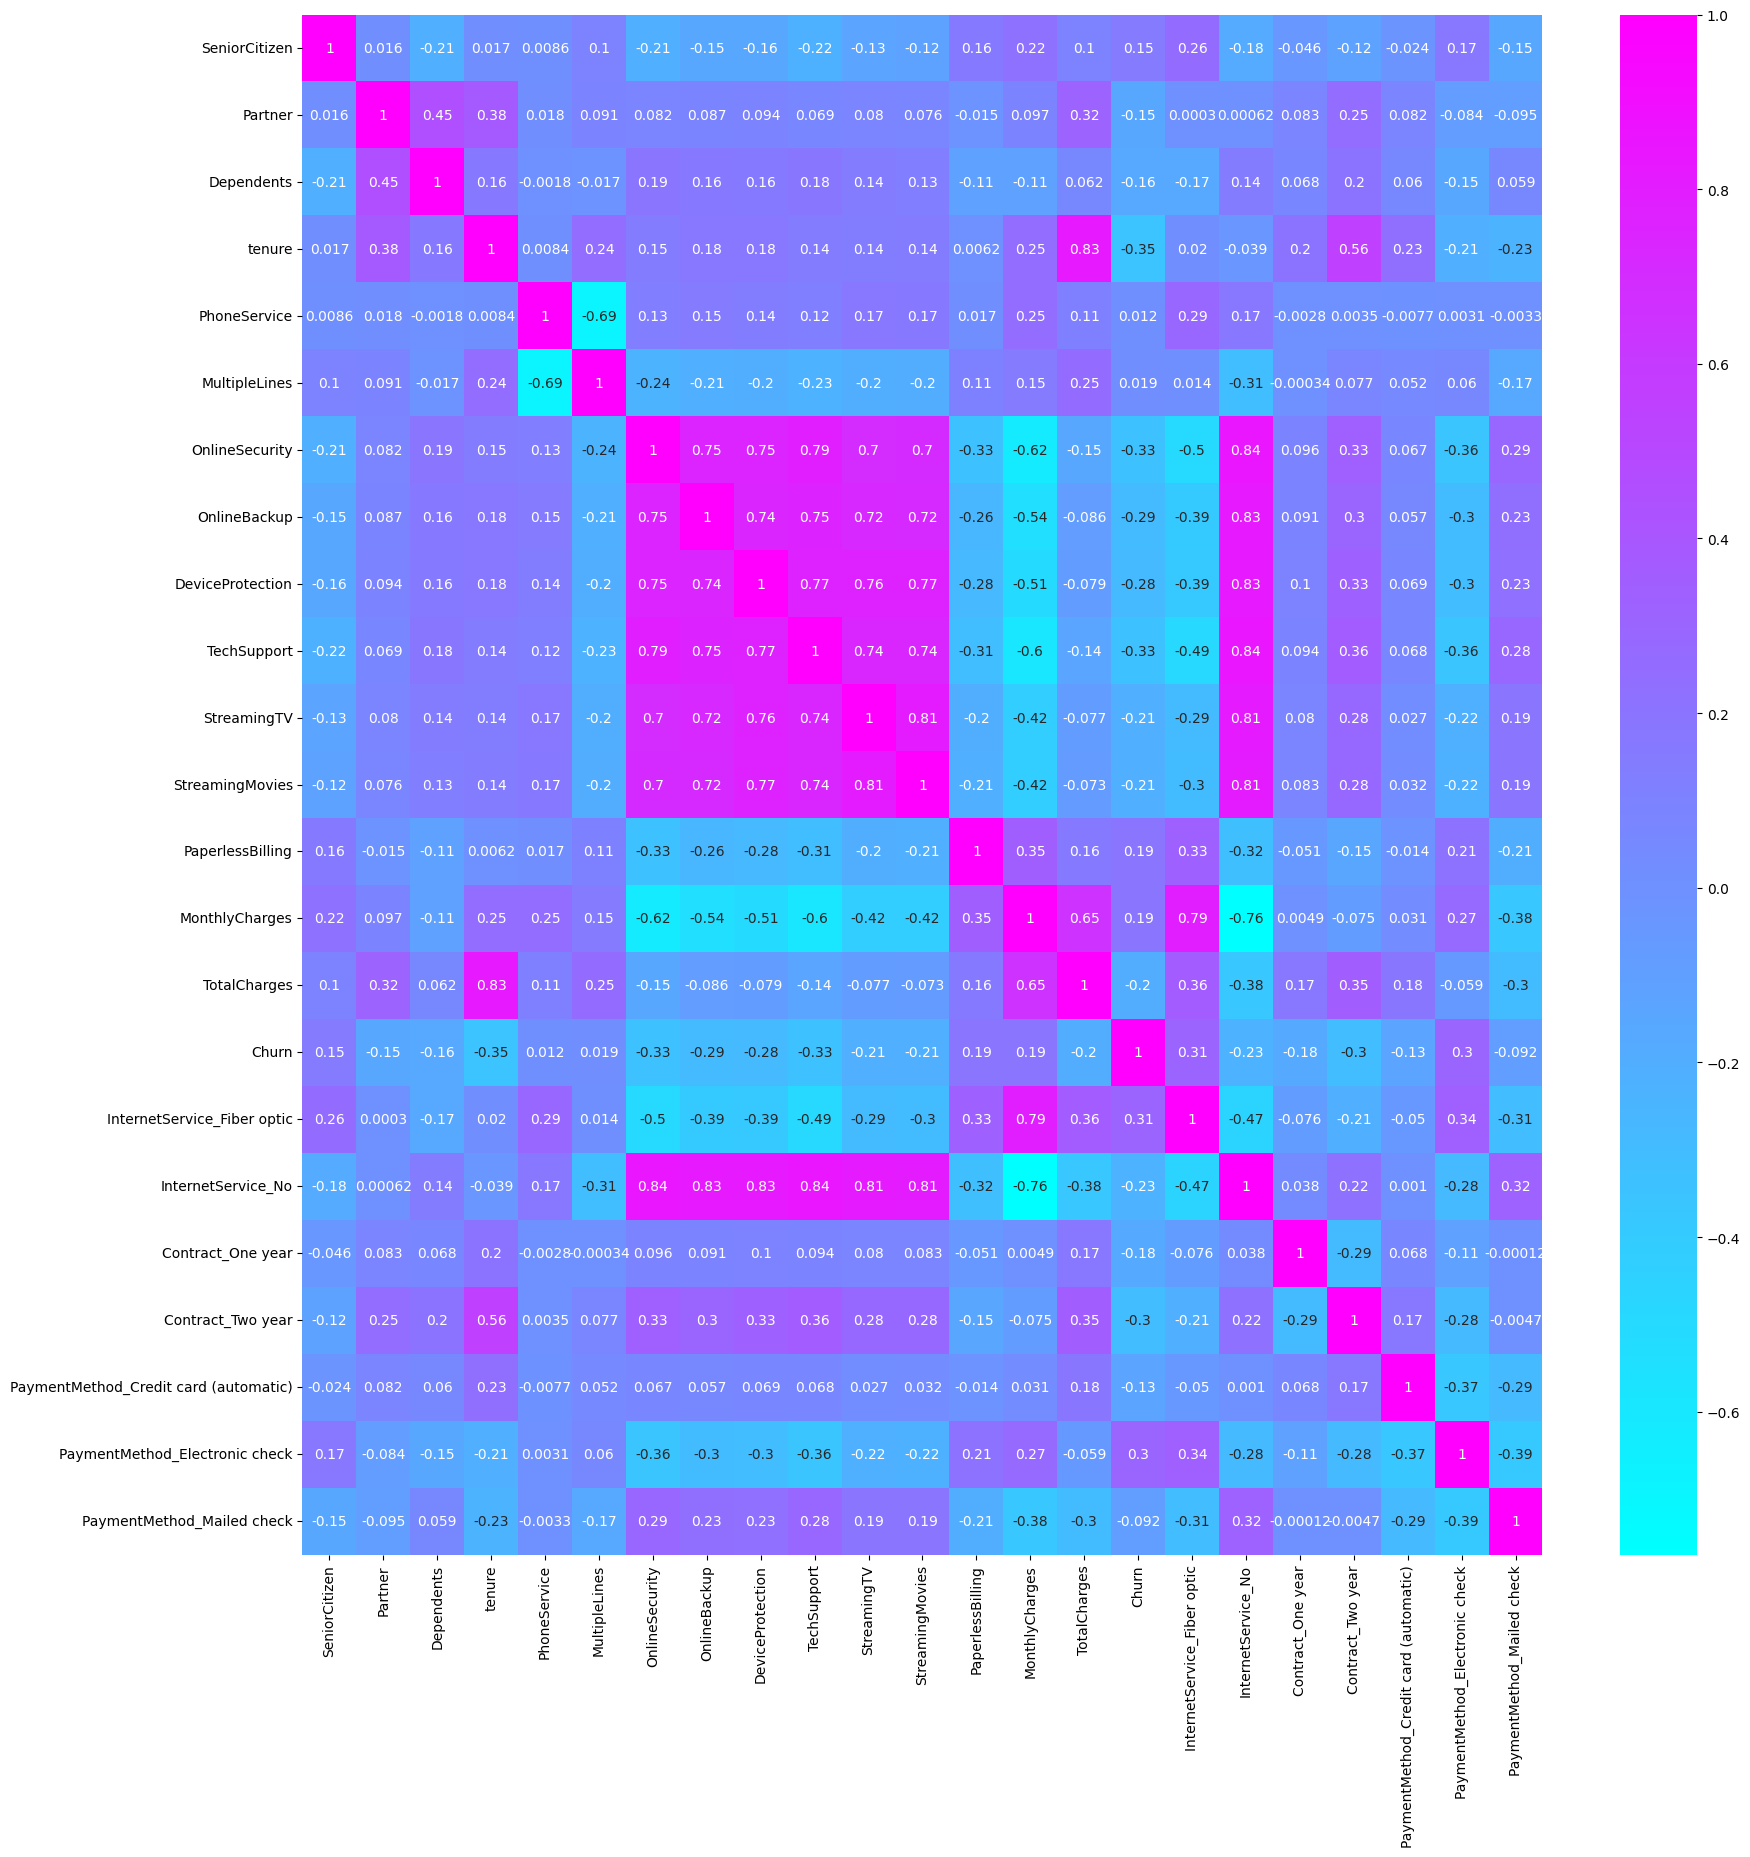

In [8]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,cmap=plt.cm.cool)

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies are strongly correlated with each other. Then detect whether collinearity in dataset.

## 6. Feature engineering

In [9]:
df['mean_tenure'] = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()
df['mean_MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()
df['mean_TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean()) / df['TotalCharges'].std()
df=df.drop('tenure',axis=1)
df=df.drop('MonthlyCharges',axis=1)
df=df.drop('TotalCharges',axis=1)

## 7. Upsampling

In [10]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Because we have significantly less 1s than 0s in the dataset, we so upsampling to balance the two types.

In [11]:
from sklearn.utils import resample
churn_df = df[df['Churn'] == 1]
nochurn_df = df[df['Churn'] == 0]
df_churn_resampled = resample(churn_df,
             replace=True,
             n_samples=len(nochurn_df),
             random_state=42)
df = pd.concat([df_churn_resampled,nochurn_df])
df['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

### Cluster

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

Text(0.5, 1.0, 'Elbow Graph')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Inertia')

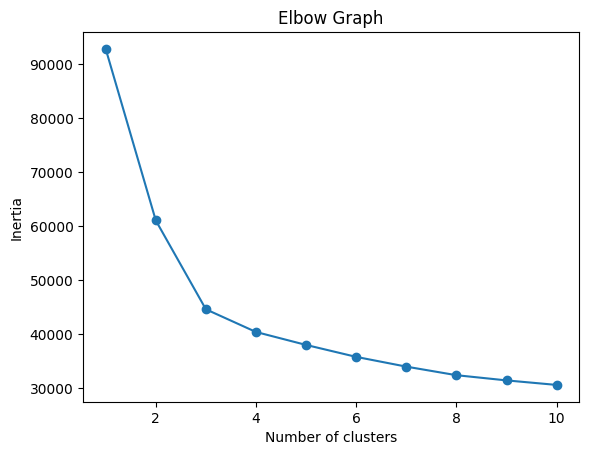

In [12]:
from sklearn.cluster import KMeans

data = df
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

n = 3 seems to be the elbow point of the graph. Then we can separate the data into 3 clusters.

In [13]:
model = KMeans(n_clusters=3)
km = model.fit(data)
cluster_map = pd.DataFrame()
cluster_map['index'] = data.index.values
cluster_map['cluster'] = km.labels_
cluster_map.head()
cluster_map['cluster'].value_counts()

,index,cluster
0,4290,1
1,5547,1
2,3302,2
3,4949,1
4,4307,2


1    5538
2    3080
0    1730
Name: cluster, dtype: int64

## 8. Model Prep 

### 8.1 VIF value

In [14]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df_vif = df.drop('Churn',axis=1)
trainvif, testvif = train_test_split(df_vif, test_size=0.30, random_state=0)
vif = pd.Series([variance_inflation_factor(trainvif.values,i)
                for i in range(trainvif.shape[1])],
               index=trainvif.columns)
vif

SeniorCitizen                             1.431526
Partner                                   2.637573
Dependents                                1.887583
PhoneService                             11.177536
MultipleLines                             3.260150
OnlineSecurity                            6.602785
OnlineBackup                              6.128667
DeviceProtection                          6.515661
TechSupport                               7.157079
StreamingTV                               8.828343
StreamingMovies                           8.710938
PaperlessBilling                          3.427817
InternetService_Fiber optic              11.396578
InternetService_No                       38.464813
Contract_One year                         1.927839
Contract_Two year                         2.944467
PaymentMethod_Credit card (automatic)     1.924650
PaymentMethod_Electronic check            3.599158
PaymentMethod_Mailed check                2.441026
mean_tenure                    

There are several predictors that have VIF value > 5. We need to perform PCA to lower the dimensions.

### 8.2 PCA

Text(0.5, 0, 'Numcomponents')

Text(0, 0.5, 'Culminative explained vairance')

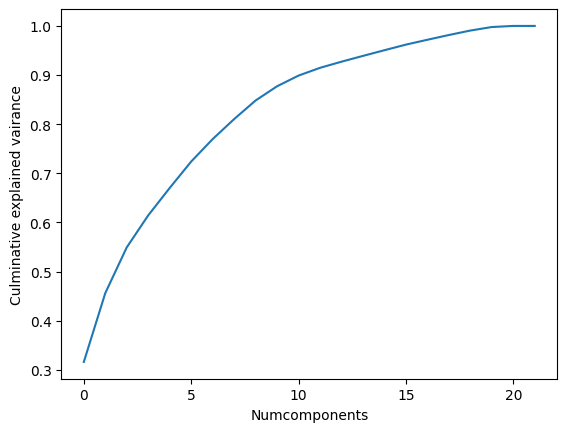

In [15]:
from sklearn.decomposition import PCA
features = df.drop('Churn',axis=1)
df_std = (features - features.mean()) / (features.std())
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numcomponents')
plt.ylabel('Culminative explained vairance')

15 variables can explain 95% of variance, so we can leave 15 variables in PCA

In [16]:
n_components = 15
pca = PCA(n_components)
pca.fit(df_std)
principalComponents = pca.fit_transform(df_std)
principalDf = pd.DataFrame(data=principalComponents,columns=['nf'+str(i+1) for i in range(n_components)])

PCA(n_components=15)

In [17]:
df_vif = principalDf
trainvif, testvif = train_test_split(df_vif, test_size=0.30, random_state=0)
vif = pd.Series([variance_inflation_factor(trainvif.values,i)
                for i in range(trainvif.shape[1])],
               index=trainvif.columns)
vif

nf1     1.000705
nf2     1.000283
nf3     1.000354
nf4     1.000389
nf5     1.000681
nf6     1.000647
nf7     1.000235
nf8     1.000239
nf9     1.000604
nf10    1.000903
nf11    1.000266
nf12    1.000342
nf13    1.000485
nf14    1.000406
nf15    1.000677
dtype: float64

Now, there's only negligible amount of colinearity in the dataset 

### 8.3 Train test split with cross-validation

In [18]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

features = principalDf
target = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=42)


### 8.4 Normalization

In [19]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(x_train)
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)

## 9. Build the model

In [20]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
logit = LogisticRegression()
logit.fit(x_train, y_train)
y_pred = logit.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

LogisticRegression()

[[772 254]
 [223 821]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1026
           1       0.76      0.79      0.77      1044

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [22]:
from sklearn import svm
model = svm.SVC(kernel='poly',probability=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVC(kernel='poly', probability=True)

[[779 247]
 [183 861]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1026
           1       0.78      0.82      0.80      1044

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=100)
rf.fit(x_train, y_train);
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

RandomForestClassifier(random_state=100)

[[891 135]
 [ 52 992]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      1026
           1       0.88      0.95      0.91      1044

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070



## 10. Evaluate the model 

In [24]:
import h2o
h2o.init()
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.361-b09, mixed mode, sharing)
  Starting server from C:\Users\zheng\Data\Python\Python311\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\zheng\AppData\Local\Temp\tmpo_tsmo9q
  JVM stdout: C:\Users\zheng\AppData\Local\Temp\tmpo_tsmo9q\h2o_zheng_started_from_python.out
  JVM stderr: C:\Users\zheng\AppData\Local\Temp\tmpo_tsmo9q\h2o_zheng_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_zheng_hqbzp2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,241.5 Mb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### Variable importance

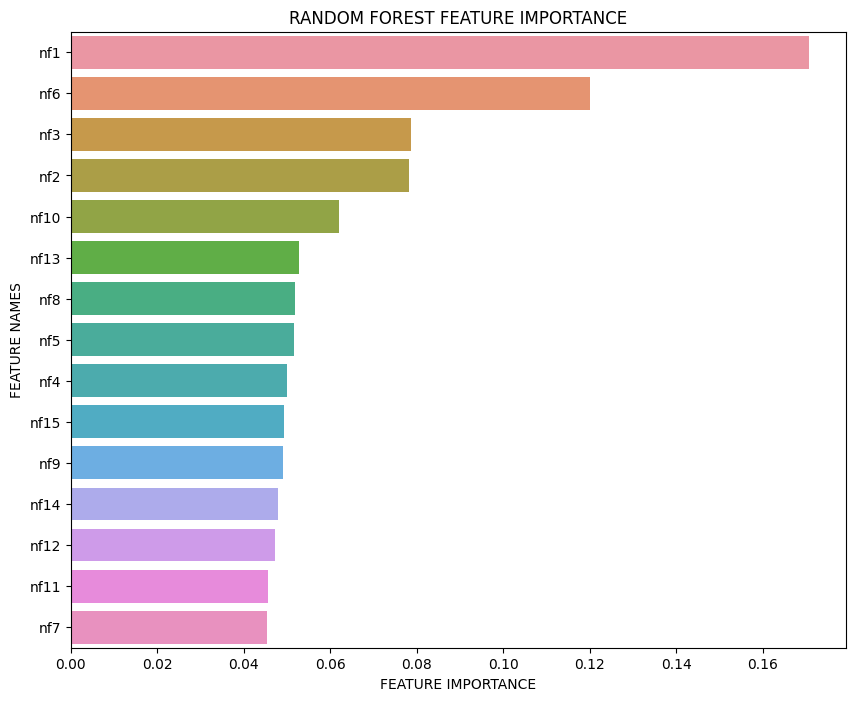

In [25]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(rf.feature_importances_,features.columns,'RANDOM FOREST')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC(ROC curve) for Random Forest model')

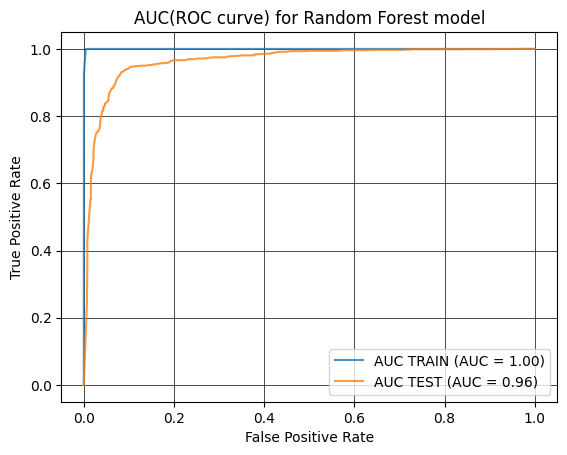

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
plt.grid(color='black', linestyle='-', linewidth=0.5)
rfc_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train, name='AUC TRAIN', ax=ax, alpha=0.8)
rfc_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, name='AUC TEST', ax=ax, alpha=0.8)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) for Random Forest model")

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision-Recall curve for Random Forest')

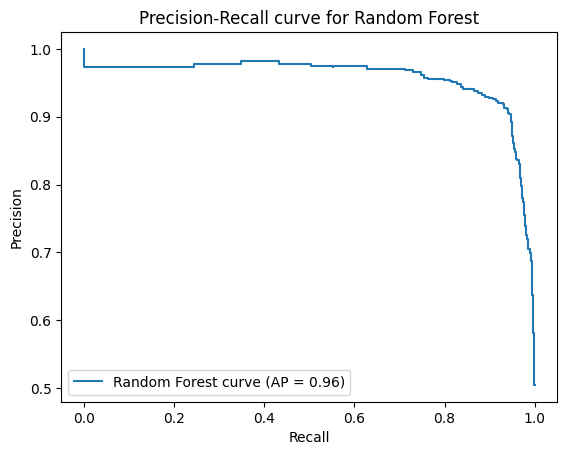

In [27]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    rf, x_test, y_test, name="Random Forest curve"
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve for Random Forest")